<a href="https://colab.research.google.com/github/mrreyesm/FINANCIAL_ASSET_ANALYSIS/blob/main/FINANCIAL_ASSET_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##FINANCIAL ASSET ANALYSIS - VISA

# Libraries

In [66]:
#Importing Librarys 
# For system related operations
import sys
# For saving access tokens and for file mngmnt when creating and adding to the dataset
import os
# For Data Processing
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# For reading stock data
import pandas_datareader as pdr
# For time stamps
from datetime import datetime, timedelta
from dateutil.tz import gettz
import time
# For sending GET requests from the API
import requests
# For dealing with json responses we receive from the API
import json
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import dateutil.parser
import unicodedata
#To add wait time between requests
import time
# For natural language processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words_n = nltk.corpus.stopwords.words('english')
from nltk import word_tokenize
# For string manipulation
import string
# To create a word cloud with tweets
from wordcloud import WordCloud
# For yahoo finance
!{sys.executable} -m pip install yfinance
import yfinance as yf
# For long strings
import textwrap
# For linear regression
from scipy import stats

#Global variables
# API key
os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAAKwsZwEAAAAARfPLFsHkhgzkATLhA4UJzvVEugQ%3DL3goAkl3kgtVBWw619JvpHPVGFJsOwetuedpvlozXPaaelGFTt'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Extract & Transform (Yahoo Finance API)

In [67]:
stock = "V"
symbol = yf.Ticker(stock)
# get historical market data
hist = symbol.history(period="max")
hist.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-03-19,13.483547,15.636382,12.463783,12.803704,708486000,0.0,0.0
2008-03-20,13.234275,14.729929,13.030322,14.582629,198985200,0.0,0.0


Text(0.5, 0, 'Date')

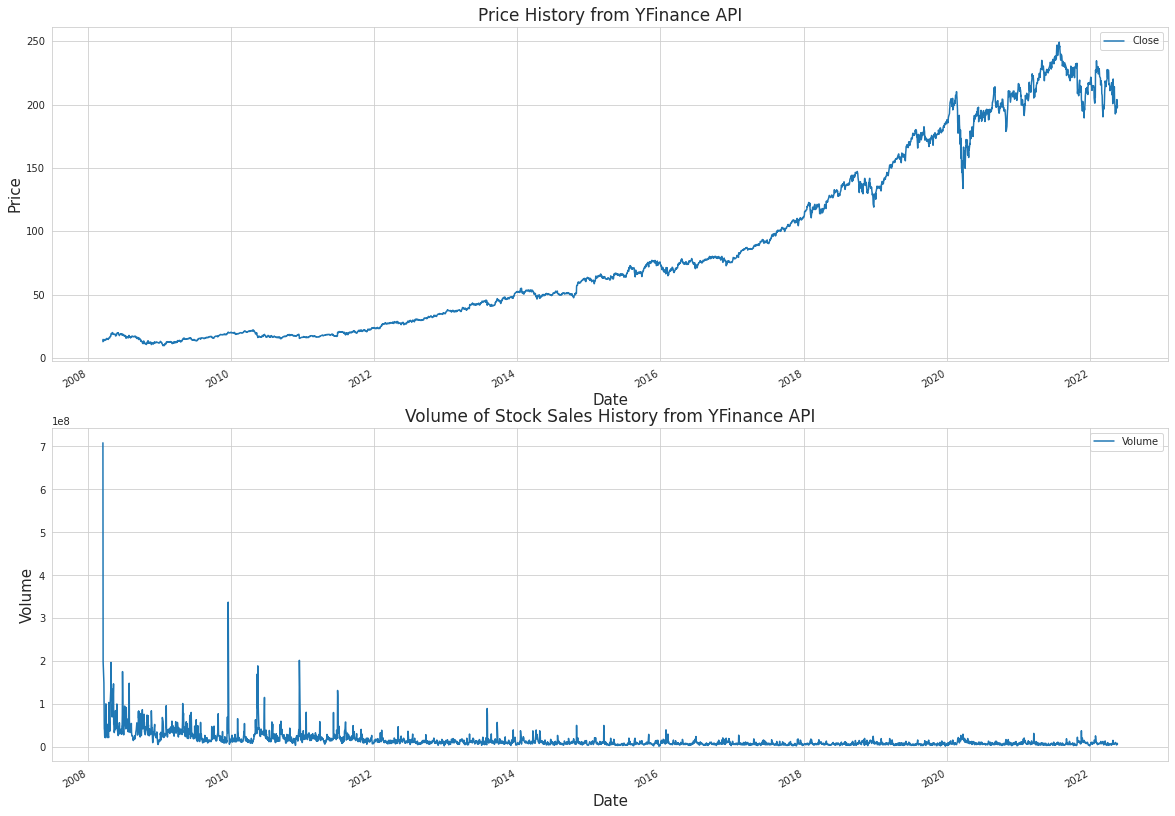

In [68]:
# Let's see a historical view of the closing price
plt.rcParams['figure.figsize'] = (20,15)
plt.subplot(2, 1, 1)
hist['Close'].plot(legend=True)
plt.title('Price History from YFinance API',fontsize=17)
plt.ylabel('Price', fontsize=15)
plt.xlabel('Date', fontsize=15)
# Now let's plot the total volume of stock being traded each day
plt.subplot(2, 1, 2)
hist['Volume'].plot(legend=True)
plt.title('Volume of Stock Sales History from YFinance API',fontsize=17)
plt.ylabel('Volume', fontsize=15)
plt.xlabel('Date', fontsize=15)

# ANALYZING DATA

In [69]:
#Basic info
longName = symbol.info["longName"]
shortName = symbol.info["shortName"]
symb = symbol.info["symbol"]
market = symbol.info["market"]
sector = symbol.info["sector"]
industry= symbol.info["industry"]
longBusinessSummary = symbol.info["longBusinessSummary"]
currentPrice = symbol.info["currentPrice"]
currency = symbol.info["currency"]
#Useful information for calculations
recommendationKey = symbol.info["recommendationKey"]
regularMarketDayHigh = symbol.info["regularMarketDayHigh"]
regularMarketDayLow = symbol.info["regularMarketDayLow"]
regularMarketPreviousClose = symbol.info["regularMarketPreviousClose"]
regularMarketOpen = symbol.info["regularMarketOpen"]
regularMarketPrice = symbol.info["regularMarketPrice"]
regularMarketVolume = symbol.info["regularMarketVolume"]
totalDebt= symbol.info["totalDebt"]
totalRevenue= symbol.info["totalRevenue"]
totalDebt= symbol.info["totalDebt"]
ebitda= symbol.info["ebitda"]
marketCap = symbol.info["marketCap"]
regularMarketPrice = symbol.info["regularMarketPrice"]
freeCashflow = symbol.info["freeCashflow"]
open = symbol.info["open"]
currentPrice = symbol.info["currentPrice"]
dayHigh = symbol.info["dayHigh"]
dayLow = symbol.info["dayLow"]
targetHighPrice = symbol.info["targetHighPrice"]
targetLowPrice = symbol.info["targetLowPrice"]
targetMeanPrice= symbol.info["targetMeanPrice"]
targetMedianPrice = symbol.info["targetMedianPrice"]
#symbol.info

In [70]:
print(f"Name: {longName} Symbol: {symb} Market: {market}")
print(f"Sector: {sector} Industry: {industry}\n\nBusiness description:")
wrapper = textwrap.TextWrapper(width=80)
word_list = wrapper.wrap(text=longBusinessSummary)  
for element in word_list:
    print(element)
print(f"\nCurrent price: {currentPrice} Currency: {currency}")

Name: Visa Inc. Symbol: V Market: us_market
Sector: Financial Services Industry: Credit Services

Business description:
Visa Inc. operates as a payments technology company worldwide. The company
facilitates digital payments among consumers, merchants, financial institutions,
businesses, strategic partners, and government entities. It operates VisaNet, a
transaction processing network that enables authorization, clearing, and
settlement of payment transactions. In addition, the company offers card
products, platforms, and value-added services. It provides its services under
the Visa, Visa Electron, Interlink, VPAY, and PLUS brands. Visa Inc. was founded
in 1958 and is headquartered in San Francisco, California.

Current price: 199.03 Currency: USD


# CAPM Capital Asset Pricing Model

The basic idea is this: if you take on more risk, you expect a higher return.
Otherwise, there's no point in taking the risk.
I wouldn't invest in something that's riskier if it brings me less returns

The question now is: what level of return is appropriate at which risk level? 
And this is what the Capital Asset Pricing Model tries to answer. 
It tells you: at this risk level, this would be an appropriate return.

CAPM Financial Reporting
https://empmd.htw-berlin.de/mod/hvp/view.php?id=1723

German bonds
https://www.bundesbank.de/

In [71]:
stock = "V"
symbol = yf.Ticker(stock)
# get historical market data
hist = symbol.history(period="max")
hist['Returns'] = hist['Close'].pct_change()
hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
Date,,,,,,,,
2008-03-19,13.483552,15.636388,12.463788,12.803709,708486000,0.0,0.0,NaN
2008-03-20,13.234275,14.729929,13.030322,14.582629,198985200,0.0,0.0,0.138938
2008-03-24,15.237550,15.341792,13.370248,13.535676,149566400,0.0,0.0,-0.071795
2008-03-25,13.728295,14.559969,13.556068,14.333355,87092000,0.0,0.0,0.058932
2008-03-26,14.215519,14.612095,13.952646,14.494254,43111600,0.0,0.0,0.011226


In [72]:
benchmark = yf.Ticker("SPY")
#Basic info
longName = benchmark.info["longName"]
shortName = benchmark.info["shortName"]
symb = benchmark.info["symbol"]
market = benchmark.info["market"]
sectorWeightings = benchmark.info["sectorWeightings"]
longBusinessSummary = benchmark.info["longBusinessSummary"]
preMarketPrice = benchmark.info["preMarketPrice"]
currency = benchmark.info["currency"]
#Print info
print(f"Name: {longName} Symbol: {symb} Market: {market}")
print(f"Sector Weightings: {sectorWeightings}")
wrapper = textwrap.TextWrapper(width=80)
word_list = wrapper.wrap(text=longBusinessSummary)  
for element in word_list:
    print(element)
print(f"\npre Market Price: {preMarketPrice} Currency: {currency}")
# get historical market data
benchmark_hist = benchmark.history(period="max")
benchmark_hist['bnchmrk_Returns'] = benchmark_hist['Close'].pct_change()
benchmark_hist.columns = benchmark_hist.columns.str.replace('Close', 'bnchmrk_Close')
benchmark_hist.sort_values(by = "Date", ascending=False).head()

Name: SPDR S&P 500 ETF Trust Symbol: SPY Market: us_market
Sector Weightings: [{'realestate': 0.0292}, {'consumer_cyclical': 0.1121}, {'basic_materials': 0.024400001}, {'consumer_defensive': 0.0733}, {'technology': 0.2468}, {'communication_services': 0.0864}, {'financial_services': 0.13149999}, {'utilities': 0.024500001}, {'industrials': 0.08270001}, {'energy': 0.0417}, {'healthcare': 0.1428}]
The Trust seeks to achieve its investment objective by holding a portfolio of
the common stocks that are included in the index (the “Portfolio”), with the
weight of each stock in the Portfolio substantially corresponding to the weight
of such stock in the index.

pre Market Price: None Currency: USD


,Open,High,Low,bnchmrk_Close,Volume,Dividends,Stock Splits,bnchmrk_Returns
Date,,,,,,,,
2022-05-20,393.250000,397.029999,380.540009,389.630005,131209600,0.0,0,0.000437
2022-05-19,388.619995,394.140015,387.109985,389.459991,98510700,0.0,0,-0.006125
2022-05-18,403.500000,403.799988,390.549988,391.859985,117674500,0.0,0,-0.040312
2022-05-17,406.529999,408.570007,402.579987,408.320007,83029700,0.0,0,0.020570
2022-05-16,399.980011,403.970001,397.600006,400.089996,78622400,0.0,0,-0.004058


In [73]:
capm = pd.merge(hist, benchmark_hist, left_index=True,
                      right_index=True)
capm = capm[["Close", "Returns", "bnchmrk_Close", "bnchmrk_Returns"]]
capm = capm.last('13M')
print("START DATE: ", capm.iloc[0].name, "END DATE: ", capm.iloc[-1].name)
mean_return_stock = capm['Returns'].mean()
stddev_return_stock = capm['Returns'].std()
print(
    "\nDAILY MEAN RETURN: ", mean_return_stock,
    "\nYEARLY MEAN RETURN: ", ((1+mean_return_stock)**250)-1,
    "\nSTD DEV: ", stddev_return_stock)
mean_return_benchmark_hist = capm['bnchmrk_Returns'].mean()
stddev_return_benchmark_hist = capm['bnchmrk_Returns'].std()
print(
    "\nDAILY RM or MARKET RETURN: ", mean_return_benchmark_hist,
    "\nYEARKY RM or MARKET RETURN: ",((1+mean_return_benchmark_hist)**250)-1,
    "\nSTD DEV: ", stddev_return_benchmark_hist)
yearly_stock_returns = ((1+mean_return_stock)**250)-1
yearly_market_returns = ((1+mean_return_benchmark_hist)**250)-1
capm.head()

START DATE:  2021-05-03 00:00:00 END DATE:  2022-05-20 00:00:00

DAILY MEAN RETURN:  -0.00040603219475680765 
YEARLY MEAN RETURN:  -0.09654471589772362 
STD DEV:  0.0181125623589426

DAILY RM or MARKET RETURN:  -0.00014649638679601503 
YEARKY RM or MARKET RETURN:  -0.0359641339425788 
STD DEV:  0.011087439513919772


,Close,Returns,bnchmrk_Close,bnchmrk_Returns
Date,,,,
2021-05-03,230.732010,-0.004067,412.768219,0.002157
2021-05-04,230.156693,-0.002493,410.221710,-0.006169
2021-05-05,227.359451,-0.012154,410.349976,0.000313
2021-05-06,229.452423,0.009206,413.626892,0.007986
2021-05-07,230.245941,0.003458,416.637238,0.007278


Slope:  1.071856227704154 
Intercept:  -0.00024900913023334235 
R value:  0.6561269938938564 
P Value:  2.9747236757774456e-34 
STD Err:  0.0757306272088474


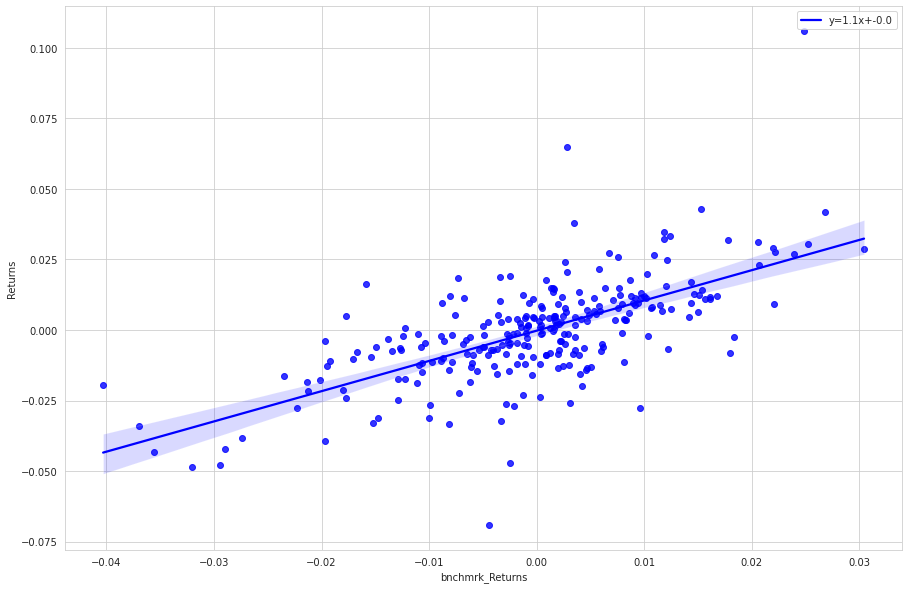

In [74]:
# get coeffs of linear fit
capm.dropna(inplace=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(capm['bnchmrk_Returns'],capm['Returns'])
print("Slope: ", slope, "\nIntercept: ", intercept,
      "\nR value: ", r_value, "\nP Value: ", p_value,
      "\nSTD Err: ", std_err)
# use line_kws to set line label for legend
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.regplot(x="bnchmrk_Returns", y="Returns", data=capm, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
# plot legend
ax.legend()
plt.show()

expected_return = RFR + Beta*((mean_return_benchmark_hist or RM) -RFR)

In [75]:
RFR = 0.95 #risk free rate - 9 to 10 years german bonds
beta = slope
shortName = symbol.info["shortName"]

if beta < 1:
  print(f"Beta < 1: less risky than market. Beta: {beta}")
else:
  print(f"Beta >= 1: as risky or more risky than the market. Beta: {beta}")

expected_return = RFR + beta*(yearly_market_returns - RFR)
print("\nExpected return or CAPM return of the stock: ", round(expected_return*100, 3), "%")

if expected_return > yearly_stock_returns:
  print(f"""\nThe CAPM returns are greater than the yearly returns of the stock, {shortName} is overvalued.
\nCAPM Returns: {round(expected_return*100, 3)}% > Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")
else:
  print(f"""\nThe CAPM returns are less than the yearly returns of the stock, {shortName} is undervalued.
\nCAPM Returns: {round(expected_return*100, 3)}% < Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")

Beta >= 1: as risky or more risky than the market. Beta: 1.071856227704154

Expected return or CAPM return of the stock:  -10.681 %

The CAPM returns are less than the yearly returns of the stock, Visa Inc. is undervalued.

CAPM Returns: -10.681% < Yearly returns of Visa Inc.: -9.654%


# Sentiment Analysis

### Yahoo Finance News

In [85]:
# Create dataframe with news info
stock = "V"
symbol = yf.Ticker(stock)
col_names = ['link', 'providerPublishTime', 'title', 'type','uuid']
news_df = pd.DataFrame(columns=col_names)
counter = 0
for news in symbol.news:
  link = news["link"]
  providerPublishTime = news["providerPublishTime"]
  title = news["title"]
  ntype = news["type"]
  uuid = news["uuid"]
# Assemble all data in a list
  res = [link, providerPublishTime, title, ntype, uuid]  
  # Append the result to the CSV file
  counter += 1
  df_length = len(news_df)
  news_df.loc[df_length] = res
# Print the number of tweets for this iteration
print("# of news added: ", counter)
news_df['providerPublishTime'] = news_df['providerPublishTime'].apply(datetime.fromtimestamp)
news_df.head()

# of news added:  8


,link,providerPublishTime,title,type,uuid
0,https://finance.yahoo.com/news/warren-buffett-...,2022-05-19 19:46:34,Warren Buffett is Buying and Holding These 10 ...,STORY,1a060bf9-5734-3a61-b6d6-fd7d7993ab9e
1,https://finance.yahoo.com/news/10-best-stocks-...,2022-05-19 13:03:40,10 Best Stocks to Buy Now According to Billion...,STORY,4bbe5a2c-ce8a-34aa-af44-febae621be09
2,https://finance.yahoo.com/news/12-best-dow-sto...,2022-05-19 13:00:17,12 Best DOW Stocks To Buy According To Hedge F...,STORY,9d8e2735-a7b3-3f3e-9ce0-3537b8cf07ec
3,https://finance.yahoo.com/news/warren-buffett-...,2022-05-18 21:04:26,Warren Buffett Is Holding These 10 Tech Stocks...,STORY,48390ad6-2ae4-3844-b0e5-f7ee829be7f4
4,https://finance.yahoo.com/news/visa-inc-partic...,2022-05-18 20:05:00,Visa Inc. to Participate in Upcoming Investor ...,STORY,96255a6d-54e2-3d51-9bbf-e3e8da55952e


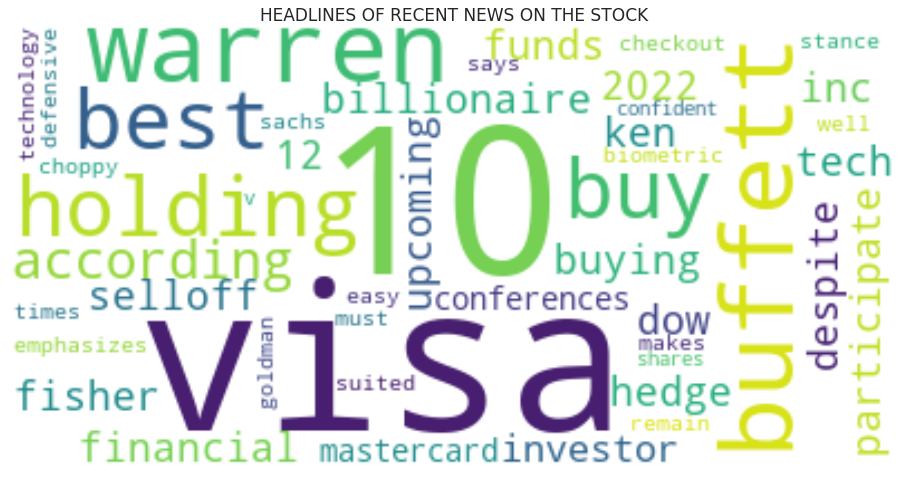

In [86]:
#Pass to list
data = news_df['title'].to_list()
#identify paaterns and create tokens
pattern = r'''(?x)                  # Flag to initiate verbose mode
              (?:[A-Z]\.)+          # get abreviations like U.S.A.
              | \w+(?:-\w+)*        # words with internal -
              | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
              | \.\.\.              # gets ...
              | [][.,;"'?():-_`]    # gets punctuation marks
'''
text = []
for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  text.append(token_2)
flatten = [w for l in text for w in l]
punctuation = list(string.punctuation)
df_2 = [w for w in flatten if w not in stop_words_n]
df_3 = [w for w in df_2 if w not in punctuation]
freq_words = nltk.FreqDist(df_3)
omit_words = ["stock", "stocks"]
df_4 =  [w for w in df_3 if w not in omit_words]
freq_words = nltk.FreqDist(df_4)
plt.rcParams['figure.figsize'] = (16,9)
wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('HEADLINES OF RECENT NEWS ON THE STOCK',fontsize=17)
plt.show()

### Tweets

In [87]:
#some API FUNCTIONS and parameters
def auth():
    return os.getenv('TOKEN')
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers
def create_url(keyword, start_date, end_date, max_results = 10):   
    search_url = "https://api.twitter.com/2/tweets/search/recent" #Change to the endpoint you want to collect data from
    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()
def append_to_csv(json_response):
    #A counter variable
    counter = 0
    #Create dataframe
    col_names = ['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet']
    tweets_df = pd.DataFrame(columns=col_names)
    #Loop through each tweet
    for tweet in json_response['data']:       
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that
        # 1. Author ID
        author_id = tweet['author_id']
        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])
        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "
        # 4. Tweet ID
        tweet_id = tweet['id']
        # 5. Language
        lang = tweet['lang']
        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']
        # 7. source
        source = tweet['source']
        # 8. Tweet text
        text = tweet['text']
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, source, text]
        # Append the result to the CSV file
        df_length = len(tweets_df)
        tweets_df.loc[df_length] = res
        counter += 1
    print("# of Tweets added from this response: ", counter)
    return tweets_df
    # Print the number of tweets for this iteration 

In [90]:
#Inputs for the request
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = f"{shortName} lang:en"
start_time = datetime.now() - timedelta(days=6)
start_time = start_time.strftime("%Y-%m-%dT%H:%M:%SZ")
end_time = datetime.now()- timedelta(days=1)
end_time = end_time.strftime("%Y-%m-%dT%H:%M:%SZ")
max_results = 100
#Checks response of the request
url = create_url(keyword, start_time, end_time, max_results)
json_response = connect_to_endpoint(url[0], headers, url[1])

Endpoint Response Code: 200


In [91]:
tweets = append_to_csv(json_response)
tweets.head()

# of Tweets added from this response:  72


,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,913165919526035456,2022-05-20 07:27:45+00:00,,1527551638088589312,en,0,0,0,0,Twitter for iPad,@keshhy @AatifaChibala AssalamAlaikum I don’t ...
1,1493496780176171011,2022-05-20 01:05:16+00:00,,1527455381525495809,en,4,0,0,1,Twitter for Android,@WATechMillenial @FlitterOnFraud @WellsFargo H...
2,2372179373,2022-05-19 14:53:58+00:00,,1527301544667975680,en,0,0,0,0,Zapier.com,$V (NYSE) Stock Rating Changed to Sell: Visa I...
3,133863081,2022-05-19 14:45:57+00:00,01a9a39529b27f36,1527299526339350530,en,3,0,0,0,Twitter for iPhone,Can’t just blame COVID-19 for this situation s...
4,923497444024909824,2022-05-19 14:28:40+00:00,,1527295175701041158,en,0,0,0,0,share to tw,Cives Mundi Inc - Visa-free travel to 165 coun...


[('inc', 70), ('https', 47), ('co', 47), ('v', 18), ('meta', 15), ('platforms', 15), ('3', 15), ('job', 14), ('investor', 12), ('filed', 12), ('us', 12), ('0', 12), ('senior', 12), ('participate', 11), ('upcoming', 11)]


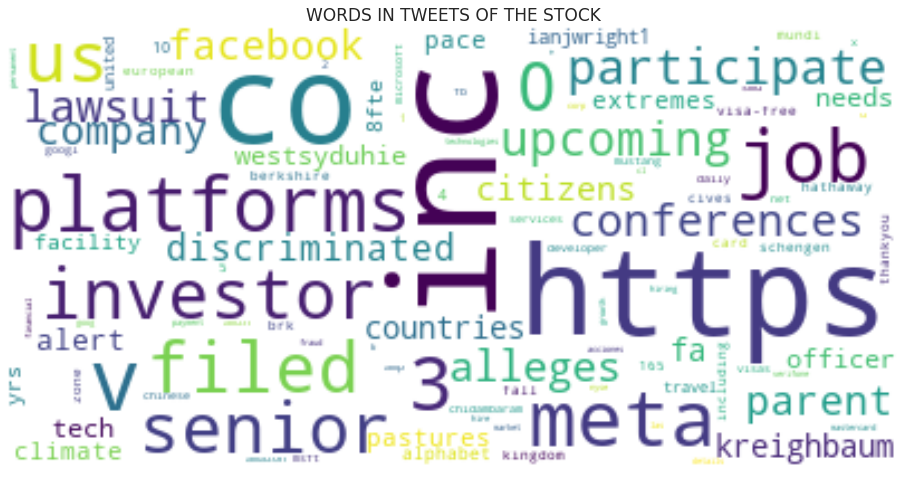

In [92]:
#Pass to list
data = tweets['tweet'].to_list()
#identify paaterns and create tokens
pattern = r'''(?x)                  # Flag to initiate verbose mode
              (?:[A-Z]\.)+          # get abreviations like U.S.A.
              | \w+(?:-\w+)*        # words with internal -
              | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
              | \.\.\.              # gets ...
              | [][.,;"'?():-_`]    # gets punctuation marks
'''
text = []
for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  text.append(token_2)
flatten = [w for l in text for w in l]
punctuation = list(string.punctuation)
df_2 = [w for w in flatten if w not in stop_words_n]
df_3 = [w for w in df_2 if w not in punctuation]
freq_words = nltk.FreqDist(df_3)
omit_words = ["rt","visa","stock", "stocks", "..."]
df_4 =  [w for w in df_3 if w not in omit_words]
freq_words = nltk.FreqDist(df_4)
print(freq_words.most_common(15))
plt.rcParams['figure.figsize'] = (16,9)
wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WORDS IN TWEETS OF THE STOCK',fontsize=17)
plt.show()

# Master functions

In [93]:
def stock_get_info(stock):
  symbol = yf.Ticker(stock)
  #Basic info
  longName = symbol.info["longName"]
  symb = symbol.info["symbol"]
  market = symbol.info["market"]
  sector = symbol.info["sector"]
  industry= symbol.info["industry"]
  longBusinessSummary = symbol.info["longBusinessSummary"]
  currency = symbol.info["currency"]
  currentPrice = symbol.info["currentPrice"]
  print(f"Name: {longName} Symbol: {symb} Market: {market}")
  print(f"Sector: {sector} Industry: {industry}\n\nBusiness description:")
  wrapper = textwrap.TextWrapper(width=80)
  word_list = wrapper.wrap(text=longBusinessSummary)  
  for element in word_list:
      print(element)
  print(f"\nCurrent price: {currentPrice} Currency: {currency}")

In [94]:
def stock_plot_hists(stock):
  symbol = yf.Ticker(stock)
  hist = symbol.history(period="max")
  # Let's see a historical view of the closing price
  plt.rcParams['figure.figsize'] = (16,9)
  plt.subplot(2, 1, 1)
  hist['Close'].plot(legend=True)
  plt.title('Price History from YFinance API',fontsize=17)
  plt.ylabel('Price', fontsize=15)
  plt.xlabel('Date', fontsize=15)
  # Now let's plot the total volume of stock being traded each day
  plt.subplot(2, 1, 2)
  hist['Volume'].plot(legend=True)
  plt.title('Volume of Stock Sales History from YFinance API',fontsize=17)
  plt.ylabel('Volume', fontsize=15)
  plt.xlabel('Date', fontsize=15)

In [95]:
def stock_news_headers_word_cloud(stock, unwanted_words):
  symbol = yf.Ticker(stock)
  # Create dataframe with news info
  col_names = ['link', 'providerPublishTime', 'title', 'type','uuid']
  news_df = pd.DataFrame(columns=col_names)
  counter = 0
  for news in symbol.news:
    link = news["link"]
    providerPublishTime = news["providerPublishTime"]
    title = news["title"]
    ntype = news["type"]
    uuid = news["uuid"]
  # Assemble all data in a list
    res = [link, providerPublishTime, title, ntype, uuid]  
    # Append the result to the CSV file
    counter += 1
    df_length = len(news_df)
    news_df.loc[df_length] = res
  # Print the number of tweets for this iteration
  print("# of news added: ", counter)
  news_df['providerPublishTime'] = news_df['providerPublishTime'].apply(datetime.fromtimestamp)
  #Pass to list
  data = news_df['title'].to_list()
  #identify paaterns and create tokens
  pattern = r'''(?x)                  # Flag to initiate verbose mode
                (?:[A-Z]\.)+          # get abreviations like U.S.A.
                | \w+(?:-\w+)*        # words with internal -
                | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
                | \.\.\.              # gets ...
                | [][.,;"'?():-_`]    # gets punctuation marks
  '''
  text = []
  for x in range(0, len(data)):
    token_1 = data[x].lower()
    token_2 = nltk.regexp_tokenize(token_1, pattern)
    text.append(token_2)
  flatten = [w for l in text for w in l]
  punctuation = list(string.punctuation)
  df_2 = [w for w in flatten if w not in stop_words_n]
  df_3 = [w for w in df_2 if w not in punctuation]
  freq_words = nltk.FreqDist(df_3)
  omit_words = ["stock", "stocks"]
  omit_words = omit_words + unwanted_words
  df_4 =  [w for w in df_3 if w not in omit_words]
  freq_words = nltk.FreqDist(df_4)
  print(freq_words.most_common(15))
  plt.rcParams['figure.figsize'] = (16,9)
  wordcloud = WordCloud(background_color='white', collocations=False,
                        max_words=100).fit_words(freq_words)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('HEADLINES OF RECENT NEWS ON THE STOCK',fontsize=17)
  plt.show()

In [96]:
#some API FUNCTIONS and parameters
def auth():
    return os.getenv('TOKEN')
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers
def create_url(keyword, start_date, end_date, max_results = 10):  
    search_url = "https://api.twitter.com/2/tweets/search/recent" #Change to the endpoint you want to collect data from
    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()
def append_to_csv(json_response):
    #A counter variable
    counter = 0
    #Create dataframe
    col_names = ['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet']
    tweets_df = pd.DataFrame(columns=col_names)
    #Loop through each tweet
    for tweet in json_response['data']:     
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that
        # 1. Author ID
        author_id = tweet['author_id']
        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])
        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "
        # 4. Tweet ID
        tweet_id = tweet['id']
        # 5. Language
        lang = tweet['lang']
        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']
        # 7. source
        source = tweet['source']
        # 8. Tweet text
        text = tweet['text']  
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, source, text]
        # Append the result to the CSV file
        df_length = len(tweets_df)
        tweets_df.loc[df_length] = res
        counter += 1
    print("# of Tweets added from this response: ", counter)
    return tweets_df
def tweeter_request(stock):
  symbol = yf.Ticker(stock)
  name = symbol.info["shortName"]
  #Inputs for the request
  bearer_token = auth()
  headers = create_headers(bearer_token)
  keyword = f"{name} lang:en"
  start_time = datetime.now() - timedelta(days=6)
  start_time = start_time.strftime("%Y-%m-%dT%H:%M:%SZ")
  end_time = datetime.now()- timedelta(days=1)
  end_time = end_time.strftime("%Y-%m-%dT%H:%M:%SZ")
  max_results = 100
  url = create_url(keyword, start_time, end_time, max_results)
  json_response = connect_to_endpoint(url[0], headers, url[1])
  tweets = append_to_csv(json_response)
  return tweets
def tweets_word_cloud(tweets_df, unwanted_words):
  #Pass to list
  data = tweets_df['tweet'].to_list()
  #identify paaterns and create tokens
  pattern = r'''(?x)                  # Flag to initiate verbose mode
                (?:[A-Z]\.)+          # get abreviations like U.S.A.
                | \w+(?:-\w+)*        # words with internal -
                | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
                | \.\.\.              # gets ...
                | [][.,;"'?():-_`]    # gets punctuation marks
  '''
  text = []
  for x in range(0, len(data)):
    token_1 = data[x].lower()
    token_2 = nltk.regexp_tokenize(token_1, pattern)
    text.append(token_2)
  flatten = [w for l in text for w in l]
  punctuation = list(string.punctuation)
  punctuation.append('https')
  punctuation.append('co')
  punctuation.append('t')
  df_2 = [w for w in flatten if w not in stop_words_n]
  df_3 = [w for w in df_2 if w not in punctuation]
  freq_words = nltk.FreqDist(df_3)
  omit_words = ["rt","stock", "stocks", "..."]
  omit_words = omit_words + unwanted_words
  df_4 =  [w for w in df_3 if w not in omit_words]
  freq_words = nltk.FreqDist(df_4)
  print(freq_words.most_common(15))
  plt.rcParams['figure.figsize'] = (16,9)
  wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('WORDS IN TWEETS OF THE STOCK',fontsize=17)
  plt.show()

In [112]:
def capm_evaluation(stock, market_ref):
  symbol = yf.Ticker(stock)
  print(f"Evaluated company: {symbol.info['longName']}")
  # get historical market data
  hist = symbol.history(period="max")
  hist['Returns'] = hist['Close'].pct_change()
  benchmark = yf.Ticker(market_ref)
  #Basic info
  longName = benchmark.info["longName"]
  shortName = benchmark.info["shortName"]
  symb = benchmark.info["symbol"]
  market = benchmark.info["market"]
  longBusinessSummary = benchmark.info["longBusinessSummary"]
  preMarketPrice = benchmark.info["preMarketPrice"]
  currency = benchmark.info["currency"]
  #Print info
  print("\n--Market reference--")
  print(f"Market: {longName} Symbol: {symb} Market: {market}")
  wrapper = textwrap.TextWrapper(width=80)
  word_list = wrapper.wrap(text=longBusinessSummary)  
  for element in word_list:
      print(element)
  print(f"\nOpen Price: {open} Currency: {currency}")
  print("\n--CAPM--")
  # get historical market data
  benchmark_hist = benchmark.history(period="max")
  benchmark_hist['bnchmrk_Returns'] = benchmark_hist['Close'].pct_change()
  benchmark_hist.columns = benchmark_hist.columns.str.replace('Close', 'bnchmrk_Close')
  capm = pd.merge(hist, benchmark_hist, left_index=True,
                      right_index=True)
  capm = capm[["Close", "Returns", "bnchmrk_Close", "bnchmrk_Returns"]]
  capm = capm.last('61M')
  print("5 Years data")
  print("START DATE: ", capm.iloc[0].name, "END DATE: ", capm.iloc[-1].name)
  mean_return_stock = capm['Returns'].mean()
  stddev_return_stock = capm['Returns'].std()
  print(
      "\nDAILY RETURNs OF STOCK: ", mean_return_stock,
      "\nYEARLY RETURNS OF STOCK: ", ((1+mean_return_stock)**250)-1)
  mean_return_benchmark_hist = capm['bnchmrk_Returns'].mean()
  stddev_return_benchmark_hist = capm['bnchmrk_Returns'].std()
  print(
      "\nDAILY RM or MARKET RETURN: ", mean_return_benchmark_hist,
      "\nYEARKY RM or MARKET RETURN: ",((1+mean_return_benchmark_hist)**250)-1)
  yearly_stock_returns = ((1+mean_return_stock)**250)-1
  yearly_market_returns = ((1+mean_return_benchmark_hist)**250)-1
  # get coeffs of linear fit
  capm.dropna(inplace=True)
  slope, intercept, r_value, p_value, std_err = stats.linregress(capm['bnchmrk_Returns'],capm['Returns'])
  print("Slope: ", slope, "\nIntercept: ", intercept,
        "\nR value: ", r_value, "\nP Value: ", p_value,
        "\nSTD Err: ", std_err)
  RFR = 0.95 #risk free rate - 9 to 10 years german bonds
  print("Risk Free Rate (RFR): ", RFR)
  beta = slope
  shortName = symbol.info["shortName"]

  if beta < 1:
    print(f"Beta < 1: less risky than market. Beta: {beta}")
  else:
    print(f"Beta >= 1: as risky or more risky than the market. Beta: {beta}")

  expected_return = RFR + beta*(yearly_market_returns - RFR)
  print(f"Expected return = {RFR} + {beta}*({yearly_market_returns} - {RFR})")
  print("\nExpected return or CAPM return of the stock: ", round(expected_return*100, 3), "%")

  if expected_return > yearly_stock_returns:
    print(f"""\nThe CAPM returns are greater than the yearly returns of the stock, {shortName} is overvalued.
  \nCAPM Returns: {round(expected_return*100, 3)}% > Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")
  else:
    print(f"""\nThe CAPM returns are less than the yearly returns of the stock, {shortName} is undervalued.
  \nCAPM Returns: {round(expected_return*100, 3)}% < Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")
  # use line_kws to set line label for legend
  plt.rcParams['figure.figsize'] = (15,10)
  ax = sns.regplot(x="bnchmrk_Returns", y="Returns", data=capm, color='b', 
  line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
  # plot legend
  ax.legend()
  plt.show()

# Evaluate
Evaluate several aspects of a given stock and create a detailed report to support the daily decision to buy or not a stock

In [98]:
stock = "V"
stock_get_info(stock)

Name: Visa Inc. Symbol: V Market: us_market
Sector: Financial Services Industry: Credit Services

Business description:
Visa Inc. operates as a payments technology company worldwide. The company
facilitates digital payments among consumers, merchants, financial institutions,
businesses, strategic partners, and government entities. It operates VisaNet, a
transaction processing network that enables authorization, clearing, and
settlement of payment transactions. In addition, the company offers card
products, platforms, and value-added services. It provides its services under
the Visa, Visa Electron, Interlink, VPAY, and PLUS brands. Visa Inc. was founded
in 1958 and is headquartered in San Francisco, California.

Current price: 199.03 Currency: USD


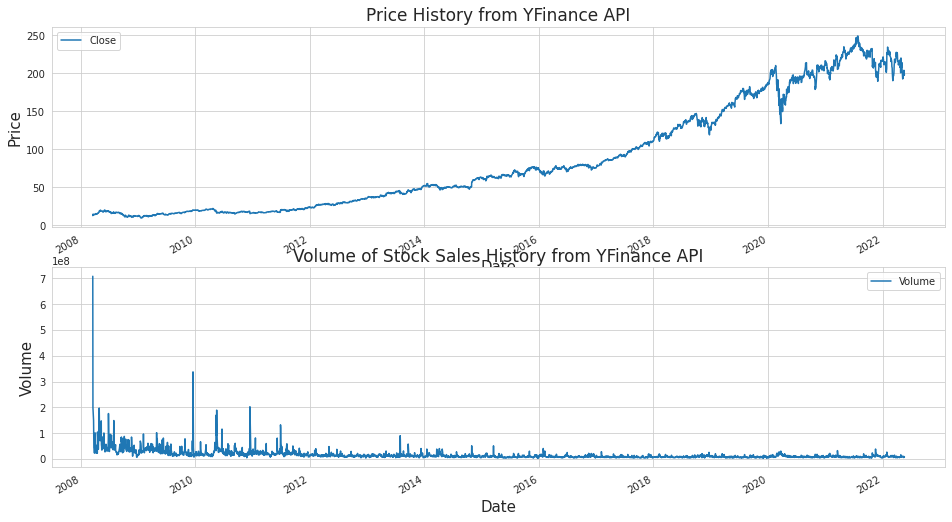

In [99]:
stock_plot_hists(stock)

Evaluated company: Visa Inc.

--Market reference--
Market: SPDR S&P 500 ETF Trust Symbol: SPY Market: us_market
The Trust seeks to achieve its investment objective by holding a portfolio of
the common stocks that are included in the index (the “Portfolio”), with the
weight of each stock in the Portfolio substantially corresponding to the weight
of such stock in the index.

Open Price: 199.67 Currency: USD

--CAPM--
5 Years data
START DATE:  2017-05-01 00:00:00 END DATE:  2022-05-20 00:00:00

DAILY RETURNs OF STOCK:  0.0007949915995974729 
YEARLY RETURNS OF STOCK:  0.2197780796701918

DAILY RM or MARKET RETURN:  0.0005334318764069182 
YEARKY RM or MARKET RETURN:  0.14261833401144175
Slope:  1.1456851625042204 
Intercept:  0.00018384661359128075 
R value:  0.8088175973901418 
P Value:  8.218300805046701e-296 
STD Err:  0.023346503102112975
Risk Free Rate (RFR):  0.95
Beta >= 1: as risky or more risky than the market. Beta: 1.1456851625042204
Expected return = 0.95 + 1.1456851625042204*(0

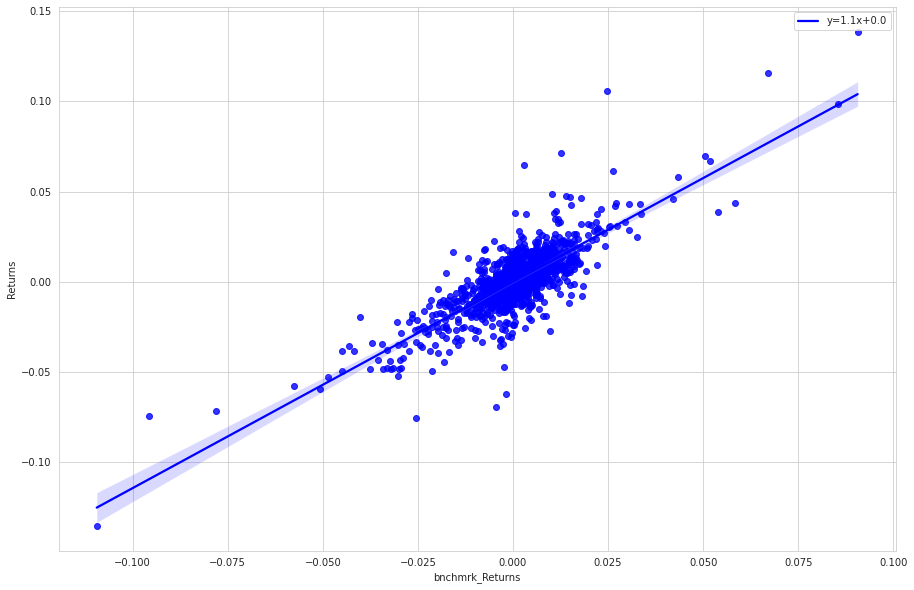

In [113]:
market_ref = 'SPY'
capm_evaluation(stock, market_ref)

# of news added:  8
[('10', 3), ('warren', 2), ('buffett', 2), ('holding', 2), ('best', 2), ('buy', 2), ('according', 2), ('buying', 1), ('financial', 1), ('2022', 1), ('billionaire', 1), ('ken', 1), ('fisher', 1), ('12', 1), ('dow', 1)]


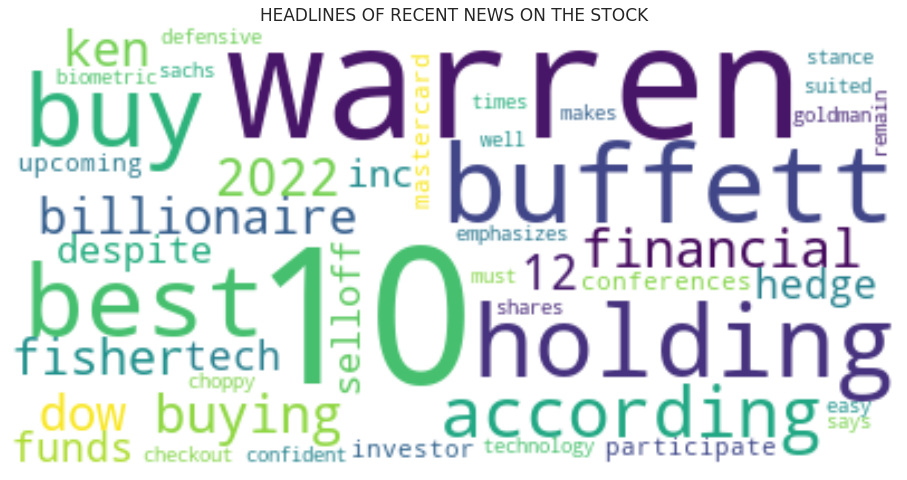

In [101]:
unwanted_words = ['visa', 'v']
stock_news_headers_word_cloud(stock, unwanted_words)

Endpoint Response Code: 200
# of Tweets added from this response:  72
[('meta', 15), ('platforms', 15), ('3', 15), ('job', 14), ('investor', 12), ('filed', 12), ('us', 12), ('0', 12), ('senior', 12), ('participate', 11), ('upcoming', 11), ('conferences', 11), ('lawsuit', 11), ('alleges', 11), ('facebook', 11)]


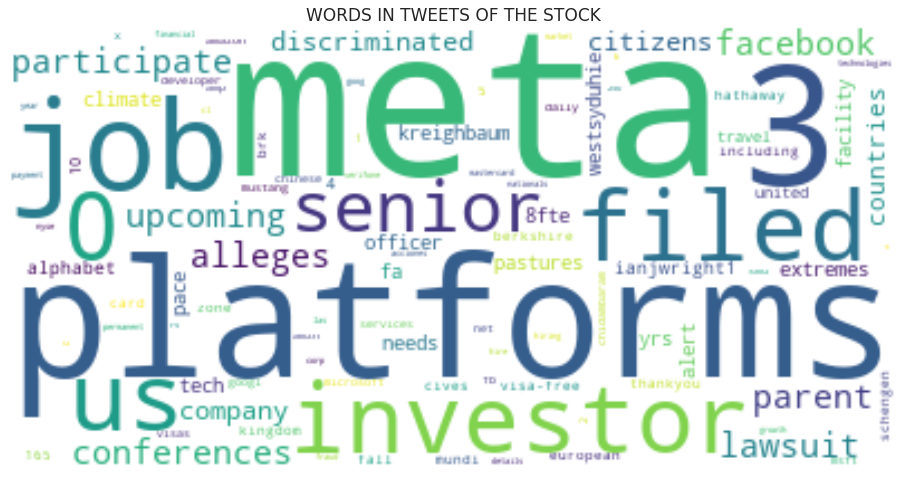

In [102]:
tweets_df = tweeter_request(stock)
unwanted_words = ['inc', 'v', 'visa']
tweets_word_cloud(tweets_df, unwanted_words)

#Guidelines

1. Getting the data from the Bloomberg terminal – with long history
2. Calculating additional features: many technical indicators such as RSI, MACD, moving average etc.
3. Calculating the signals based on each of the indicators
Example: RSI between 30 – 70 nothing; below 30 buy, above 70 sell
https://www.investopedia.com/terms/r/rsi.asp
https://cointelegraph.com/news/here-s-3-ways-the-relative-strength-index-rsi-can-be-used-as-a-sell-signal
4. Later probably applying some feature selection methods here – Boruta, …
5. Calculate the BINARY target variable sell or buy e.g. based on the 1st differences day by day
6. Based on all of these signals train a classifier
7. Improve classification by parameter adjustments e.g. the boundaries 30 and 70

8. convert data to data series
www.alpharithms.com/relative-strength-index-rsi-in-python-470209/
10. Calculate technical indicators such as RSI
www.alpharithms.com/relative-strength-index-rsi-in-python-470209/
11. Stick with one asset




